In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
path = '.\..\..\dataset\PSD_to_Pandas\pump_6dB_00020406_full_spectrum_128.pkl'
df = pd.read_pickle(path)
frequ = df.columns[df.dtypes==np.float64]
descriptive = [label for label in df.columns[df.dtypes==np.object] if not 'abnormal' in label]
target = ['abnormal']
IDs = df.ID.unique()

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df[df.ID==IDs[0]][df['abnormal']==0][frequ])
x = scaler.transform(df[df.ID==IDs[0]][frequ])
y = df.abnormal[df.ID==IDs[0]]


C:\ProgramData\Anaconda3\envs\mimiibaseTF2GPU\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


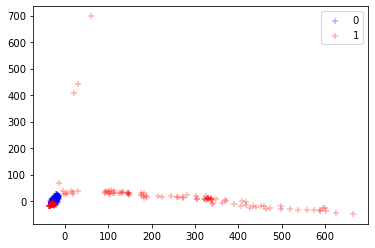

In [4]:
from sklearn.decomposition import PCA
n_prin_comp = 50
pca_test = PCA(n_components=n_prin_comp, svd_solver='full')
pca_test.fit(x)
X_pca = pca_test.transform(x)

def p_pca(X_pca, n, c):
    plt.scatter(X_pca[y==n][:,0], X_pca[y==n][:,1], color=c
                        , marker='+', alpha=.3, label=n)
    
p_pca(X_pca, 0, 'b')
p_pca(X_pca, 1, 'r')
plt.legend()

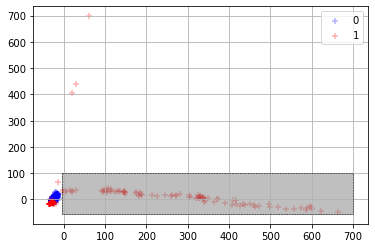

In [5]:
%run ../cluster_visual_selector.py

x_range = [-5,700]
y_range = [-55,100]
box_idx = box_points(X_pca[:,0],X_pca[:,1], x_range, y_range)
p_pca(X_pca, 0, 'b')
p_pca(X_pca, 1, 'r')
box_outline_plot(x_range, y_range)
plt.legend()
plt.grid()

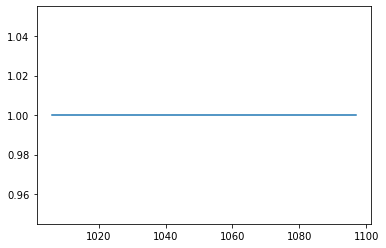

In [6]:
plt.plot(y[box_idx])